In [1]:
import pandas as pd
import duckdb


def load_results(res_list):
    df_list = []
    for f in res_list:
        df = pd.read_csv(f)
        df_list.append(df)
        # drop_first_row = df.iloc[1:]
        # df_list.append(drop_first_row)
    df = pd.concat(df_list)

    sql = """
        SELECT 
            ((max(qid)+1)/3)::integer as qid, 
            spatial_resolution, 
            temporal_resolution, 
            time_span, 
            area_persent, 
            category, 
            avg(execution_time) as avg_execution_time
        FROM df
        GROUP BY spatial_resolution, temporal_resolution, time_span, area_persent, category
        ORDER BY max(qid)
        """
    df_avg = duckdb.query(sql).to_df()
    return df_avg

In [ ]:
import glob
result_list = glob.glob("proposed_heatmap_result_*.csv")
df_proposed = load_results(result_list)
df_proposed

vanilla_list = glob.glob("vanilla_heatmap_result_*.csv")
df_vanilla = load_results(vanilla_list)
df_vanilla

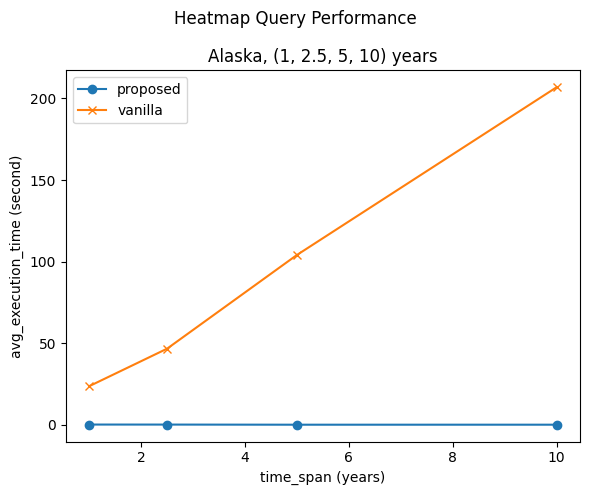

In [3]:
import matplotlib.pyplot as plt

# subplot (1, 1)
fig, axs = plt.subplots(1, 1, figsize=(6, 5), sharey=True)

# axs[0]: changing_time
df_changing_time = df_proposed[df_proposed["category"] == "changing_time"]
axs.plot(df_changing_time["time_span"], df_changing_time["avg_execution_time"], label="proposed", marker="o")
df_vanilla_changing_time = df_vanilla[df_vanilla["category"] == "changing_time"]
axs.plot(
    df_vanilla_changing_time["time_span"], df_vanilla_changing_time["avg_execution_time"], label="vanilla", marker="x"
)
axs.set_title("Alaska, (1, 2.5, 5, 10) years")
axs.set_xlabel("time_span (years)")
axs.set_ylabel("avg_execution_time (second)")
axs.legend()


# add fig title
fig.suptitle("Heatmap Query Performance")
fig.tight_layout()
plt.show()